%%Flight  Delay Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set(style='whitegrid')
warnings.simplefilter('ignore')

In [ ]:
%load_ext sql

In [ ]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
%sql duckdb://

Connecting to 'duckdb://'

In [ ]:
%sql show tables

Running query in 'duckdb://'

name


以下, ファイルのパスは各自で置き換えて下さい!!

In [ ]:
%sql SELECT * FROM 'data/airports.csv' LIMIT 5

Running query in 'duckdb://'

IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404
ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.6819
ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [ ]:
%sql SELECT * FROM 'data/airlines.csv' LIMIT 5

Running query in 'duckdb://'

IATA_CODE,AIRLINE
UA,United Air Lines Inc.
AA,American Airlines Inc.
US,US Airways Inc.
F9,Frontier Airlines Inc.
B6,JetBlue Airways


In [ ]:
%sql SELECT * FROM 'data/flights.csv' LIMIT 5

Running query in 'duckdb://'

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,2354,-11,21,0015,205,194,169,1448,0404,4,0430,0408,-22,0,0,None,None,None,None,None,None
2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,0002,-8,12,0014,280,279,263,2330,0737,4,0750,0741,-9,0,0,None,None,None,None,None,None
2015,1,1,4,US,840,N171US,SFO,CLT,0020,0018,-2,16,0034,286,293,266,2296,0800,11,0806,0811,5,0,0,None,None,None,None,None,None
2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,0015,-5,15,0030,285,281,258,2342,0748,8,0805,0756,-9,0,0,None,None,None,None,None,None
2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,0024,-1,11,0035,235,215,199,1448,0254,5,0320,0259,-21,0,0,None,None,None,None,None,None


In [ ]:
%%sql flights_by_airlines <<
SELECT a.airline, count(*) as counts_of_flights
FROM 'data/flights.csv'　as f JOIN 'data/airlines.csv' as  a
ON f.airline = a. iata_code GROUP BY a.airline ORDER BY count(*) DESC;

Running query in 'duckdb://'

In [ ]:
flights_by_airlines

AIRLINE,counts_of_flights
Southwest Airlines Co.,1261855
Delta Air Lines Inc.,875881
American Airlines Inc.,725984
Skywest Airlines Inc.,588353
Atlantic Southeast Airlines,571977
United Air Lines Inc.,515723
American Eagle Airlines Inc.,294632
JetBlue Airways,267048
US Airways Inc.,198715
Alaska Airlines Inc.,172521


In [ ]:
df_flights_by_airlines = pd.DataFrame(flights_by_airlines)
df_flights_by_airlines

,AIRLINE,counts_of_flights
0,Southwest Airlines Co.,1261855
1,Delta Air Lines Inc.,875881
2,American Airlines Inc.,725984
3,Skywest Airlines Inc.,588353
4,Atlantic Southeast Airlines,571977
5,United Air Lines Inc.,515723
6,American Eagle Airlines Inc.,294632
7,JetBlue Airways,267048
8,US Airways Inc.,198715
9,Alaska Airlines Inc.,172521


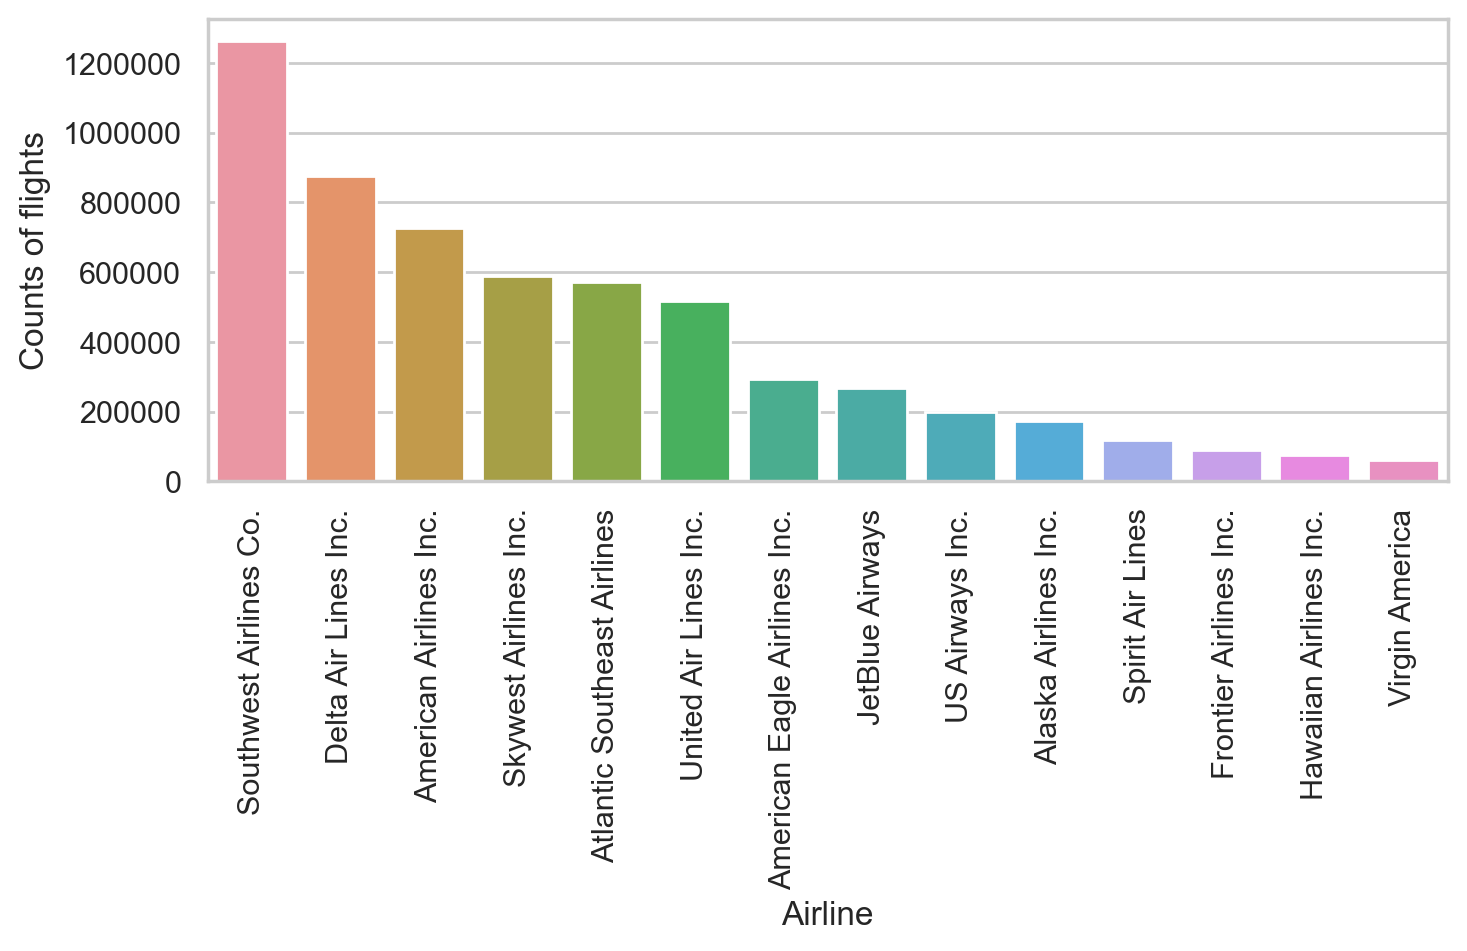

In [ ]:
fig = plt.figure(figsize=(8, 3)) 
sns.barplot(x='AIRLINE', y='counts_of_flights', data=df_flights_by_airlines)
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Counts of flights')
plt.ticklabel_format(style='plain',axis='y')
plt.savefig('flights_by_airlines.png', format="png", bbox_inches='tight', dpi=100)
plt.show()

In [ ]:
%%sql flights_by_month <<
SELECT month, count(*) as 'counts_of_flights' 
FROM 'data/flights.csv' GROUP BY month ORDER BY MONTH;

Running query in 'duckdb://'

In [ ]:
df_flights_by_month = pd.DataFrame(flights_by_month)
df_flights_by_month

,MONTH,counts_of_flights
0,1,469968
1,2,429191
2,3,504312
3,4,485151
4,5,496993
5,6,503897
6,7,520718
7,8,510536
8,9,464946
9,10,486165


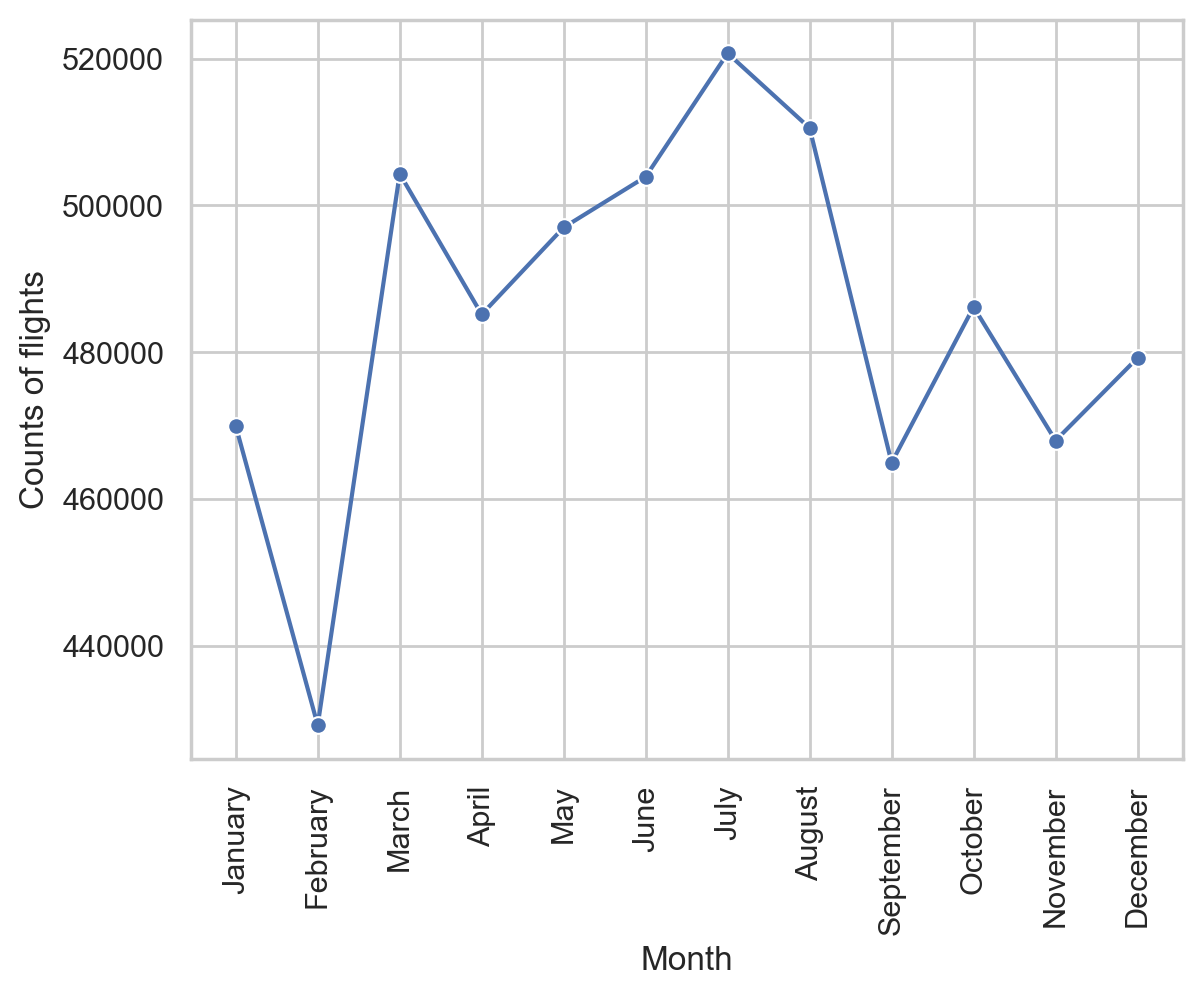

In [ ]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December' ]
sns.lineplot(x=month, y='counts_of_flights', data=df_flights_by_month, marker='o')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Counts of flights')
plt.savefig('flights_by_airlines.png', format="png", bbox_inches='tight', dpi=100)
plt.show()

In [ ]:
%%sql flights_by_day_of_month <<
SELECT day, count(*) as 'counts_of_flights' FROM 'data/flights.csv' GROUP BY day ORDER BY day;

Running query in 'duckdb://'

In [ ]:
df_flights_by_day_of_month = pd.DataFrame(flights_by_day_of_month)
df_flights_by_day_of_month.head()

,DAY,counts_of_flights
0,1,189477
1,2,195986
2,3,190007
3,4,190893
4,5,189766


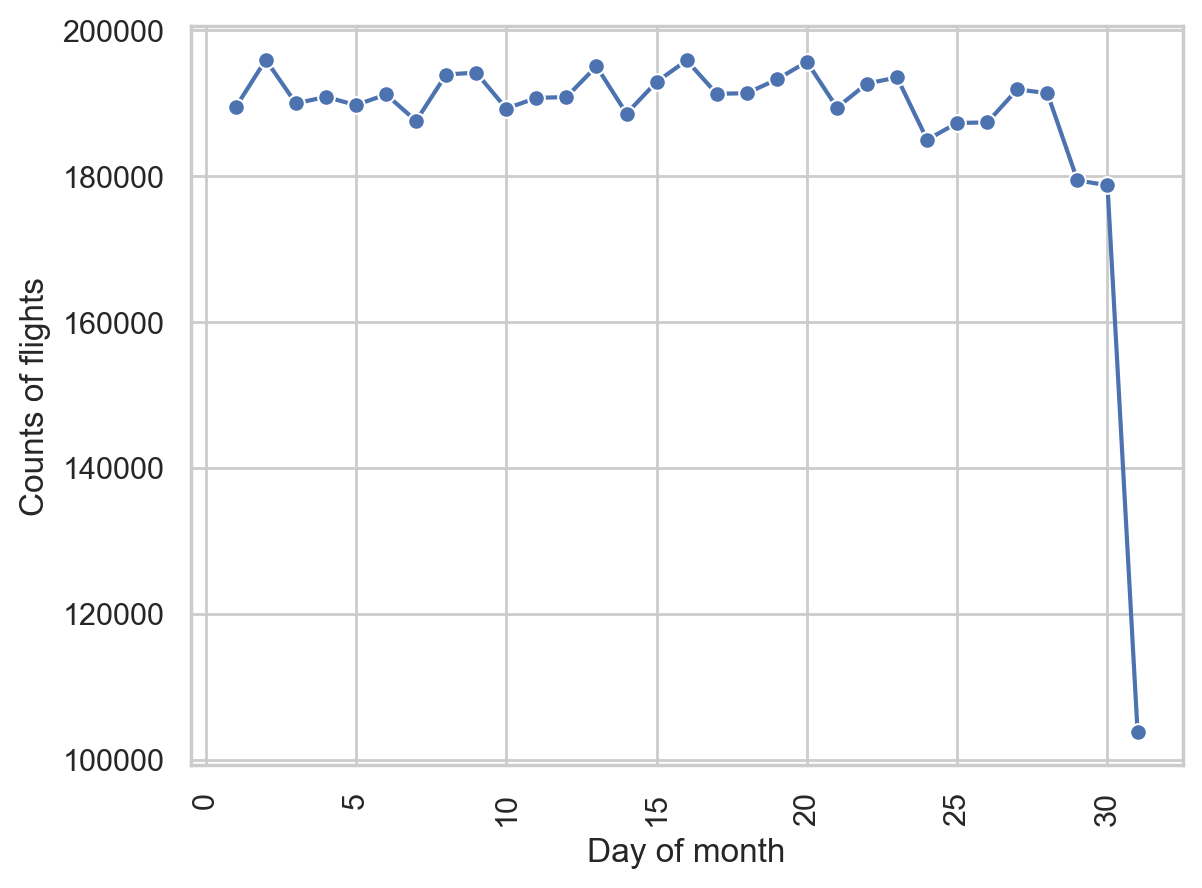

In [ ]:
sns.lineplot(x='DAY', y='counts_of_flights', data=df_flights_by_day_of_month, marker='o')
plt.xticks(rotation=90)
plt.xlabel('Day of month')
plt.ylabel('Counts of flights')
plt.savefig('flights_by_day_of_month.png', format="png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
%%sql flights_by_day_of_week <<
SELECT day_of_week, count(*) as 'counts_of_flights' FROM 'data/flights.csv' GROUP BY day_of_week ORDER BY day_of_week;

Running query in 'duckdb://'

In [ ]:
df_flights_by_day_of_week = pd.DataFrame(flights_by_day_of_week)
df_flights_by_day_of_week

,DAY_OF_WEEK,counts_of_flights
0,1,865543
1,2,844600
2,3,855897
3,4,872521
4,5,862209
5,6,700545
6,7,817764


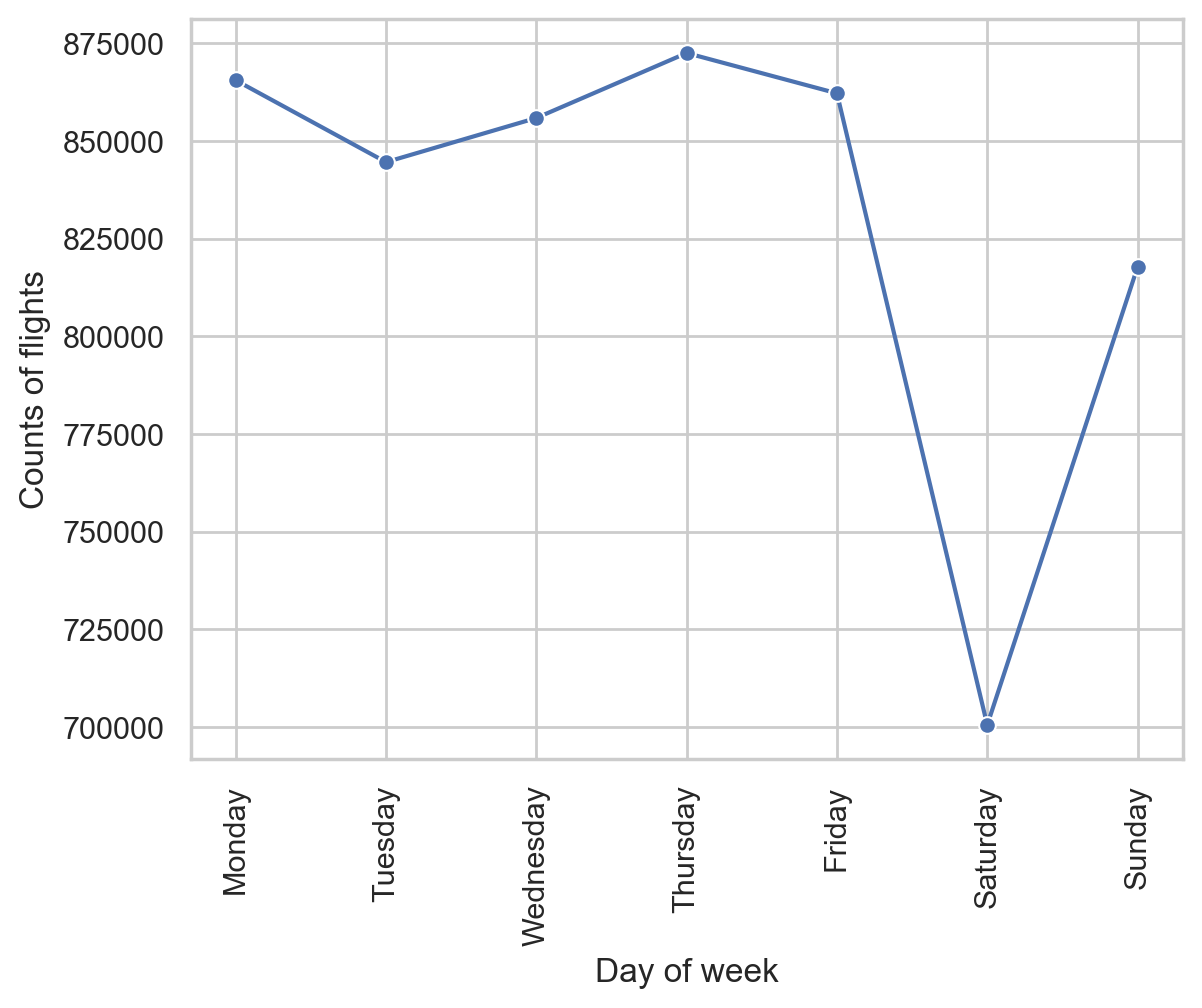

In [ ]:
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.lineplot(x=day_of_week, y='counts_of_flights', data=df_flights_by_day_of_week, marker='o')
plt.xticks(rotation=90)
plt.xlabel('Day of week')
plt.ylabel('Counts of flights')
plt.savefig('flights_by_day_of_week.png', format="png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
%%sql 
SELECT airline, count(*) as 'counts_of_cancelled_flights' FROM 'data/flights.csv' WHERE cancelled = '1' GROUP BY airline;

Running query in 'duckdb://'

AIRLINE,counts_of_cancelled_flights
WN,16043
EV,15231
B6,4276
AA,10919
DL,3824
AS,669
OO,9960
US,4067
NK,2004
HA,171


In [ ]:
%%sql 
SELECT * FROM 'data/flights.csv' AS f
JOIN 'data/airlines.csv' AS a
ON f.airline = a.iata_code
WHERE f.cancelled = '1';

Running query in 'duckdb://'

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_1
2015,1,1,4,AS,136,N431AS,ANC,SEA,0135,None,None,None,None,205,None,None,1448,None,None,0600,None,None,0,1,A,None,None,None,None,None,AS,Alaska Airlines Inc.
2015,1,1,4,AA,2459,N3BDAA,PHX,DFW,0200,None,None,None,None,120,None,None,868,None,None,0500,None,None,0,1,B,None,None,None,None,None,AA,American Airlines Inc.
2015,1,1,4,OO,5254,N746SK,MAF,IAH,0510,None,None,None,None,87,None,None,429,None,None,0637,None,None,0,1,B,None,None,None,None,None,OO,Skywest Airlines Inc.
2015,1,1,4,MQ,2859,N660MQ,SGF,DFW,0525,None,None,None,None,95,None,None,364,None,None,0700,None,None,0,1,B,None,None,None,None,None,MQ,American Eagle Airlines Inc.
2015,1,1,4,OO,5460,N583SW,RDD,SFO,0530,None,None,None,None,90,None,None,199,None,None,0700,None,None,0,1,A,None,None,None,None,None,OO,Skywest Airlines Inc.
2015,1,1,4,MQ,2926,N932MQ,CHS,DFW,0545,None,None,None,None,190,None,None,987,None,None,0755,None,None,0,1,B,None,None,None,None,None,MQ,American Eagle Airlines Inc.
2015,1,1,4,OO,6457,N560SW,SMX,LAX,0545,None,None,None,None,66,None,None,134,None,None,0651,None,None,0,1,A,None,None,None,None,None,OO,Skywest Airlines Inc.
2015,1,1,4,MQ,3534,N925MQ,ABI,DFW,0550,None,None,None,None,55,None,None,158,None,None,0645,None,None,0,1,B,None,None,None,None,None,MQ,American Eagle Airlines Inc.
2015,1,1,4,MQ,3161,N5PBMQ,XNA,DFW,0555,None,None,None,None,75,None,None,280,None,None,0710,None,None,0,1,B,None,None,None,None,None,MQ,American Eagle Airlines Inc.
2015,1,1,4,AA,175,N3EWAA,DCA,DFW,0600,None,None,None,None,215,None,None,1192,None,None,0835,None,None,0,1,B,None,None,None,None,None,AA,American Airlines Inc.


In [ ]:
%%sql cancellation_counts <<
SELECT a.airline, 
SUM(CASE WHEN f.cancelled = '1' THEN 1 ELSE 0 END) AS 'counts_cancellation',
SUM(CASE WHEN f.cancelled = '1' THEN 1 ELSE 0 END) * 100/ COUNT(*) AS 'cancellation_percentage'
FROM 'data/flights.csv' AS f
JOIN 'data/airlines.csv' AS a
ON f.airline = a.iata_code
GROUP BY a.airline;

Running query in 'duckdb://'

In [ ]:
df_cancellation_counts = pd.DataFrame(cancellation_counts)
df_cancellation_counts

,AIRLINE,counts_cancellation,cancellation_percentage
0,Virgin America,534,0.862640
1,United Air Lines Inc.,6573,1.274521
2,Frontier Airlines Inc.,588,0.647320
3,American Eagle Airlines Inc.,15025,5.099582
4,Spirit Air Lines,2004,1.707290
5,Southwest Airlines Co.,16043,1.271382
6,Delta Air Lines Inc.,3824,0.436589
7,American Airlines Inc.,10919,1.504028
8,Alaska Airlines Inc.,669,0.387779
9,JetBlue Airways,4276,1.601210


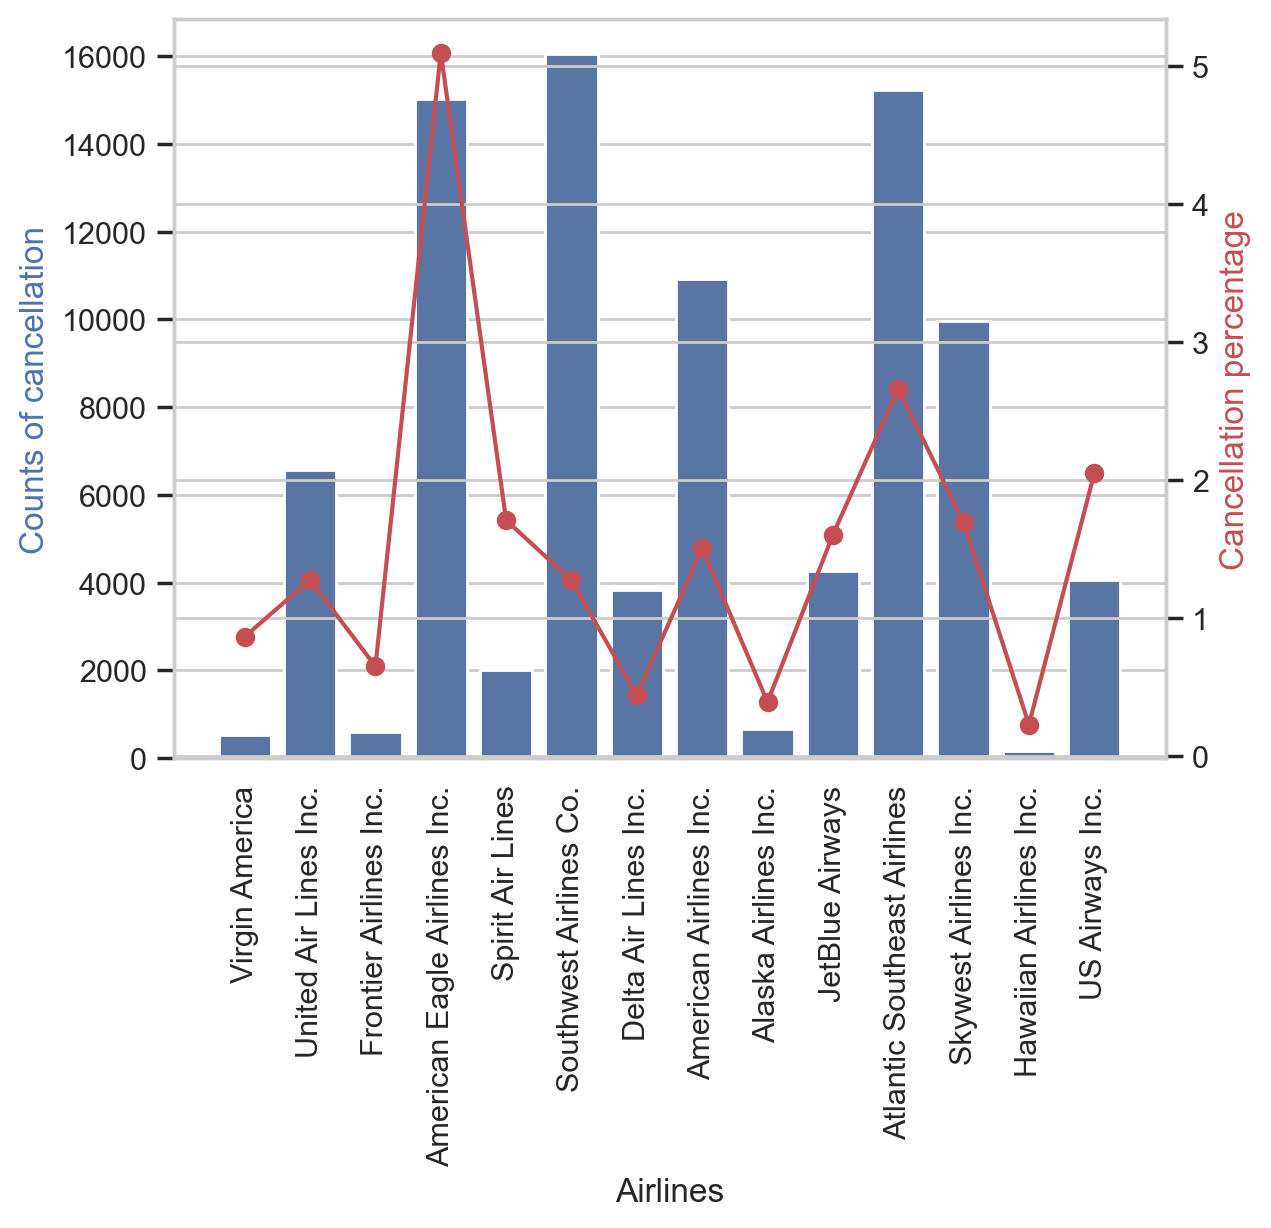

In [ ]:
fig, ax1 = plt.subplots()

sns.barplot(x='AIRLINE', y='counts_cancellation', data=df_cancellation_counts, color='b')

ax2 = ax1.twinx()
ax2.plot('AIRLINE', 'cancellation_percentage', data=df_cancellation_counts, color='r', marker='o')

ax1.set_xlabel('Airlines')
ax1.set_ylabel('Counts of cancellation', color='b')
ax2.set_ylabel('Cancellation percentage', color='r')
ax1.set_xticklabels(df_cancellation_counts['AIRLINE'], rotation=90)
plt.savefig('cancellation.png', format="png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
%%sql cancellation_reason <<
SELECT cancellation_reason, COUNT(*) as count FROM 'data/flights.csv' 
WHERE cancelled = '1' 
AND cancellation_reason IS NOT NULL
GROUP BY cancellation_reason
ORDER BY cancellation_reason;

Running query in 'duckdb://'

In [ ]:
df_cancellation_reason = pd.DataFrame(cancellation_reason)
df_cancellation_reason

,CANCELLATION_REASON,count
0,A,25262
1,B,48851
2,C,15749
3,D,22


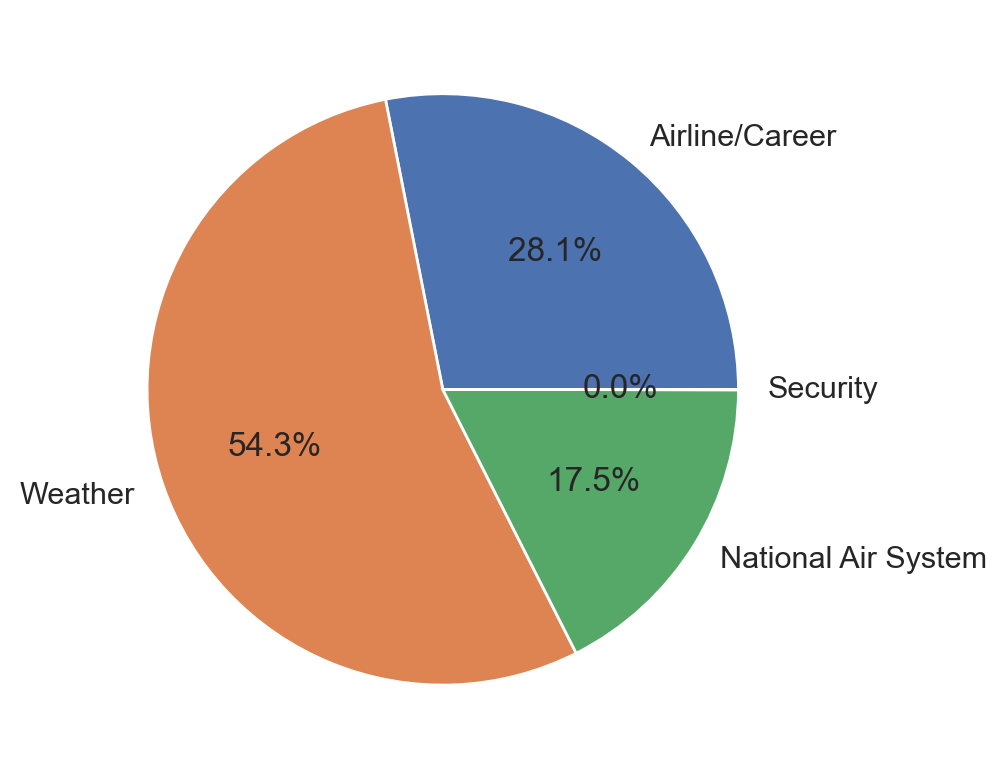

In [ ]:
labels = ['Airline/Career', 'Weather', 'National Air System', 'Security']
plt.pie(df_cancellation_reason['count'], labels=labels, autopct='%1.1f%%')
plt.savefig('cancellation_reasons.png', format="png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
%%sql counts_cancelled_flights_due_to_airline <<
SELECT a.airline AS airline,
SUM(CASE WHEN cancellation_reason = 'A' THEN 1 ELSE 0 END) AS 'counts_cancelled_flights',
SUM(CASE WHEN cancellation_reason = 'A' THEN 1 ELSE 0 END) * 100/ COUNT(*) AS 'percentage_cancellation_airline'
FROM 'data/flights.csv' AS f
JOIN 'data/airlines.csv' AS a
ON f.airline = a.iata_code
GROUP BY a.airline;

Running query in 'duckdb://'

In [ ]:
df_counts_cancelled_flights_due_to_airline = pd.DataFrame(counts_cancelled_flights_due_to_airline)
df_counts_cancelled_flights_due_to_airline

,airline,counts_cancelled_flights,percentage_cancellation_airline
0,Virgin America,157,0.253623
1,United Air Lines Inc.,2870,0.556500
2,Alaska Airlines Inc.,334,0.193600
3,American Airlines Inc.,2879,0.396565
4,JetBlue Airways,883,0.330652
5,Delta Air Lines Inc.,594,0.067817
6,Southwest Airlines Co.,6122,0.485159
7,US Airways Inc.,1007,0.506756
8,Hawaiian Airlines Inc.,170,0.222887
9,Skywest Airlines Inc.,3205,0.544741


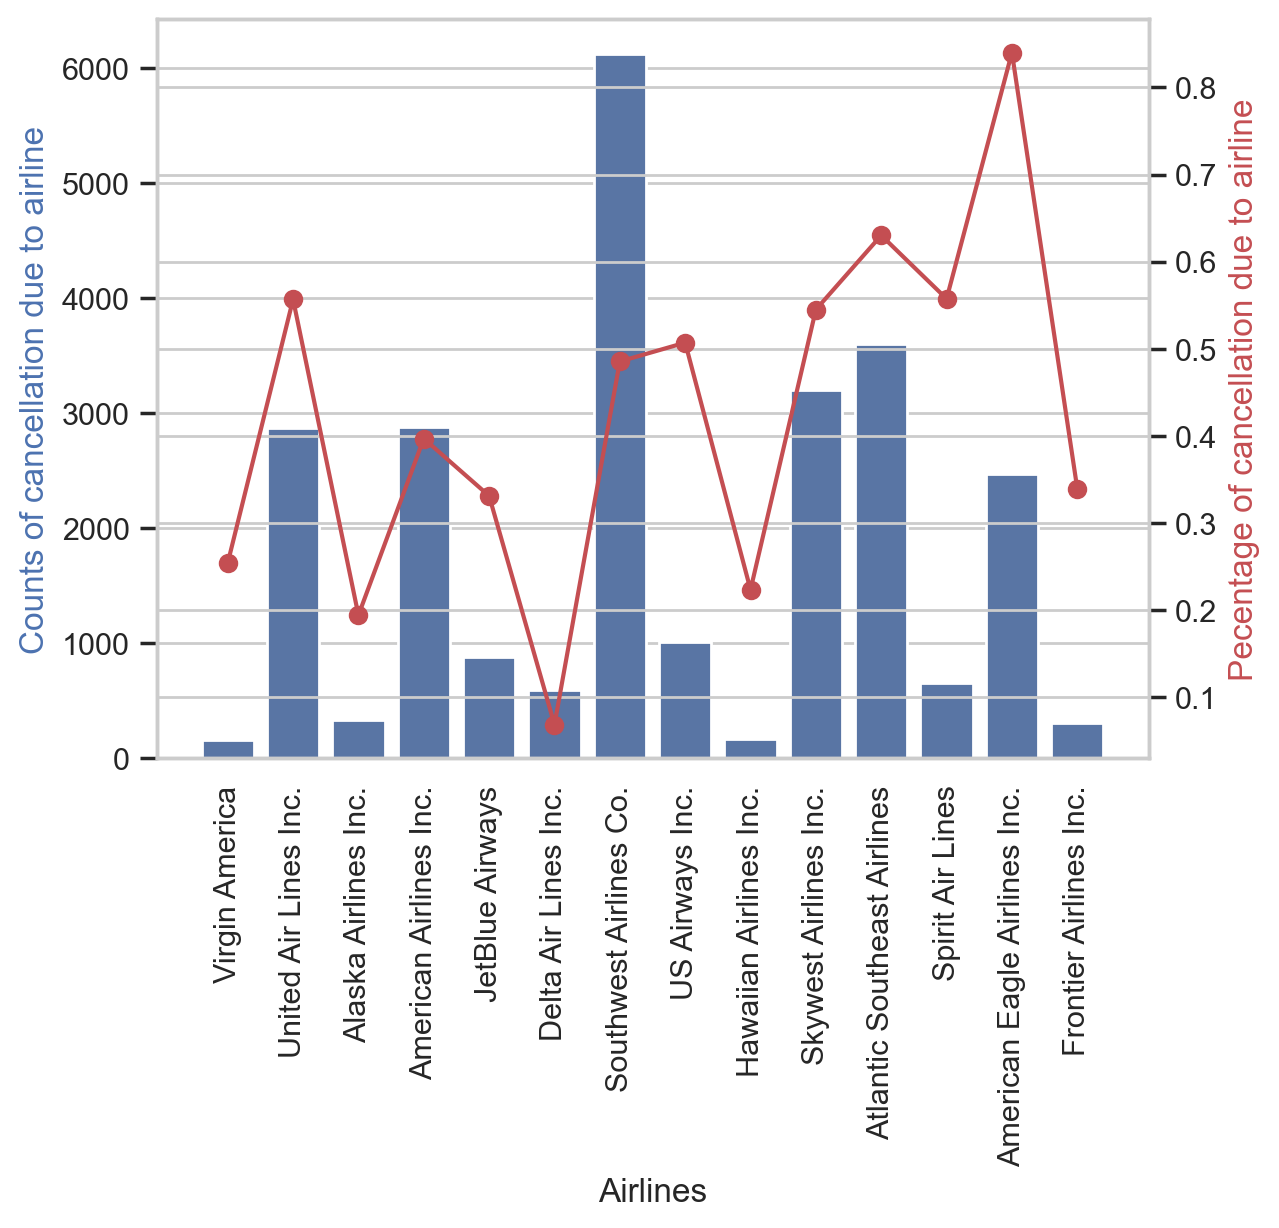

In [ ]:
fig, ax1 = plt.subplots()

sns.barplot(x='airline', y='counts_cancelled_flights', data=df_counts_cancelled_flights_due_to_airline, color='b')

ax2 = ax1.twinx()
ax2.plot('airline', 'percentage_cancellation_airline', data=df_counts_cancelled_flights_due_to_airline, color='r', marker='o')

ax1.set_xlabel('Airlines')
ax1.set_ylabel('Counts of cancellation due to airline', color='b')
ax2.set_ylabel('Pecentage of cancellation due to airline', color='r')
ax1.set_xticklabels(df_counts_cancelled_flights_due_to_airline['airline'], rotation=90)
plt.savefig('cancellation_airline.png', format="png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
%%sql delayed_flights <<
SELECT a.airline AS airline, 
COUNT(*) AS total_flights,
SUM(CASE WHEN f.departure_delay > 0 THEN 1 ELSE 0 END) AS delayed_flights,
AVG(f.departure_delay) as average_delay
FROM 'data/flights.csv' AS f
JOIN 'data/airlines.csv' AS a
ON f.airline = a.iata_code
GROUP BY a.airline;

Running query in 'duckdb://'

In [ ]:
df_delayed_flights = pd.DataFrame(delayed_flights)
df_delayed_flights

,airline,total_flights,delayed_flights,average_delay
0,Virgin America,61903,23379,9.022595
1,United Air Lines Inc.,515723,256550,14.435441
2,Alaska Airlines Inc.,172521,43566,1.785801
3,JetBlue Airways,267048,102061,11.514353
4,American Airlines Inc.,725984,245904,8.900856
5,US Airways Inc.,198715,62565,6.141137
6,Skywest Airlines Inc.,588353,171572,7.801104
7,Hawaiian Airlines Inc.,76272,20146,0.485713
8,Atlantic Southeast Airlines,571977,169897,8.715934
9,Delta Air Lines Inc.,875881,282463,7.369254


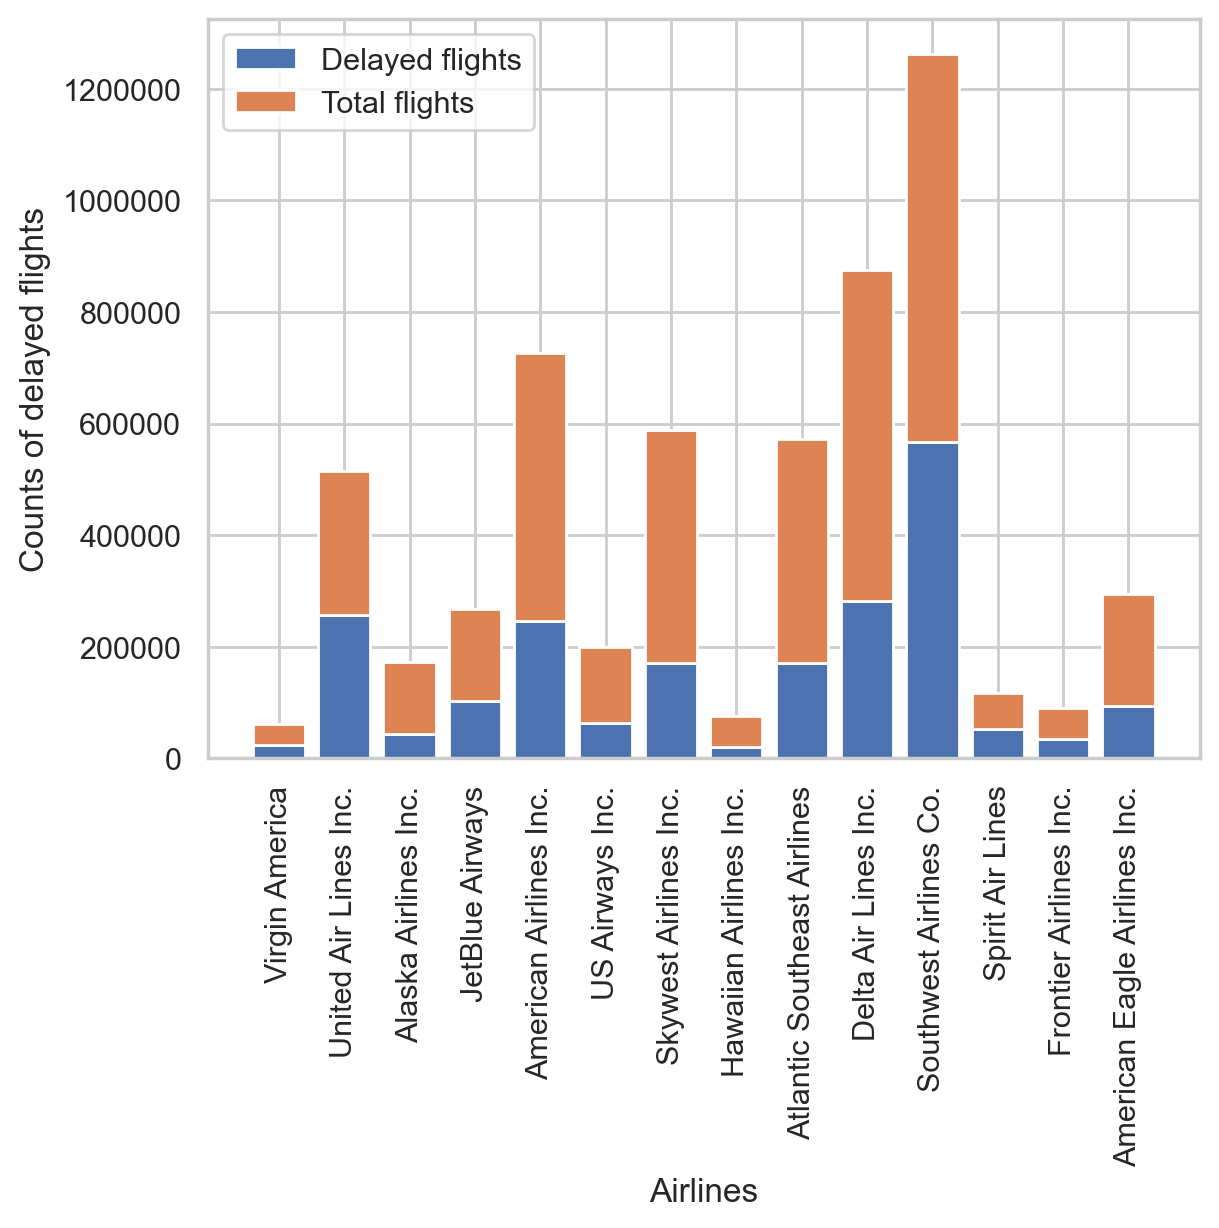

In [ ]:
fig, ax = plt.subplots()
df_delayed_flights['ontime_flights'] = df_delayed_flights['total_flights'] - df_delayed_flights['delayed_flights']
rects1 = ax.bar('airline', 'delayed_flights', data=df_delayed_flights, label='Delayed flights')
rects2 = ax.bar('airline', 'ontime_flights', data=df_delayed_flights, bottom='delayed_flights', label='Total flights')
ax.set_xticklabels(df_delayed_flights['airline'], rotation=90)
plt.ticklabel_format(style='plain',axis='y')
plt.legend()
plt.xlabel('Airlines')
plt.ylabel('Counts of delayed flights')
plt.savefig('delay.png', format="png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
%%sql delay_reasons <<
SELECT SUM(CASE WHEN air_system_delay > 0 THEN 1 ELSE 0 END) AS 'air system_delay',
SUM(CASE WHEN security_delay > 0 THEN 1 ELSE 0 END) AS 'security_delay',
SUM(CASE WHEN airline_delay> 0 THEN 1 ELSE 0 END) AS 'airline_delay',
SUM(CASE WHEN late_aircraft_delay > 0 THEN 1 ELSE 0 END) AS 'aircraft_delay',
SUM(CASE WHEN weather_delay > 0 THEN 1 ELSE 0 END) AS 'weather_delay'
FROM 'data/flights.csv';

Running query in 'duckdb://'

In [ ]:
df_delay_reasons = pd.DataFrame(delay_reasons)
df_delay_reasons

,air system_delay,security_delay,airline_delay,aircraft_delay,weather_delay
0,564826,3484,570022,556953,64716


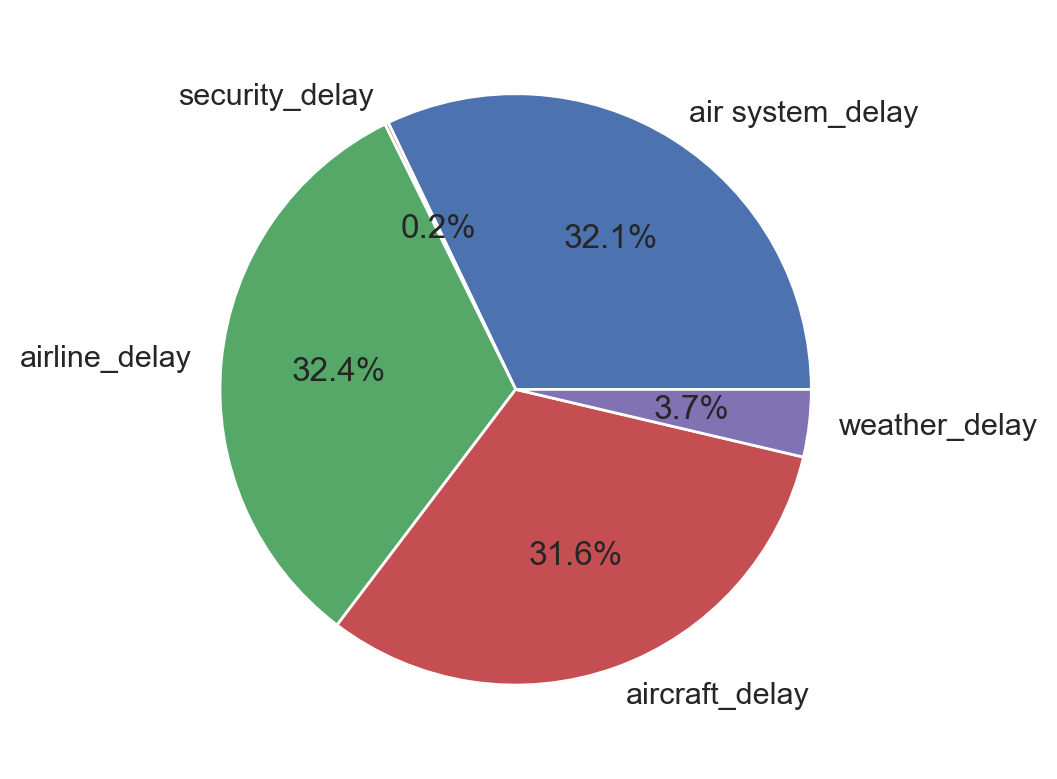

In [ ]:
labels = ['Airline/Career', 'Weather', 'National Air System', 'Security']
plt.pie(df_delay_reasons.loc[0].values, labels=df_delay_reasons.columns, autopct='%1.1f%%')
plt.savefig('delay_reasons.png', format="png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
%%sql airline_delays <<
SELECT a.airline AS airline, 
COUNT(*) AS 'counts_of_delays'
FROM 'data/flights.csv' AS f
JOIN 'data/airlines.csv' AS a
ON f.airline = a.iata_code
WHERE f.airline_delay > 0
GROUP BY a.airline;

Running query in 'duckdb://'

In [ ]:
df_airline_delays = pd.DataFrame(airline_delays)
df_airline_delays

,airline,counts_of_delays
0,Virgin America,4445
1,Southwest Airlines Co.,144524
2,Delta Air Lines Inc.,63128
3,Frontier Airlines Inc.,11517
4,American Eagle Airlines Inc.,27236
5,Spirit Air Lines,17307
6,American Airlines Inc.,68656
7,Alaska Airlines Inc.,8363
8,JetBlue Airways,38665
9,United Air Lines Inc.,65999


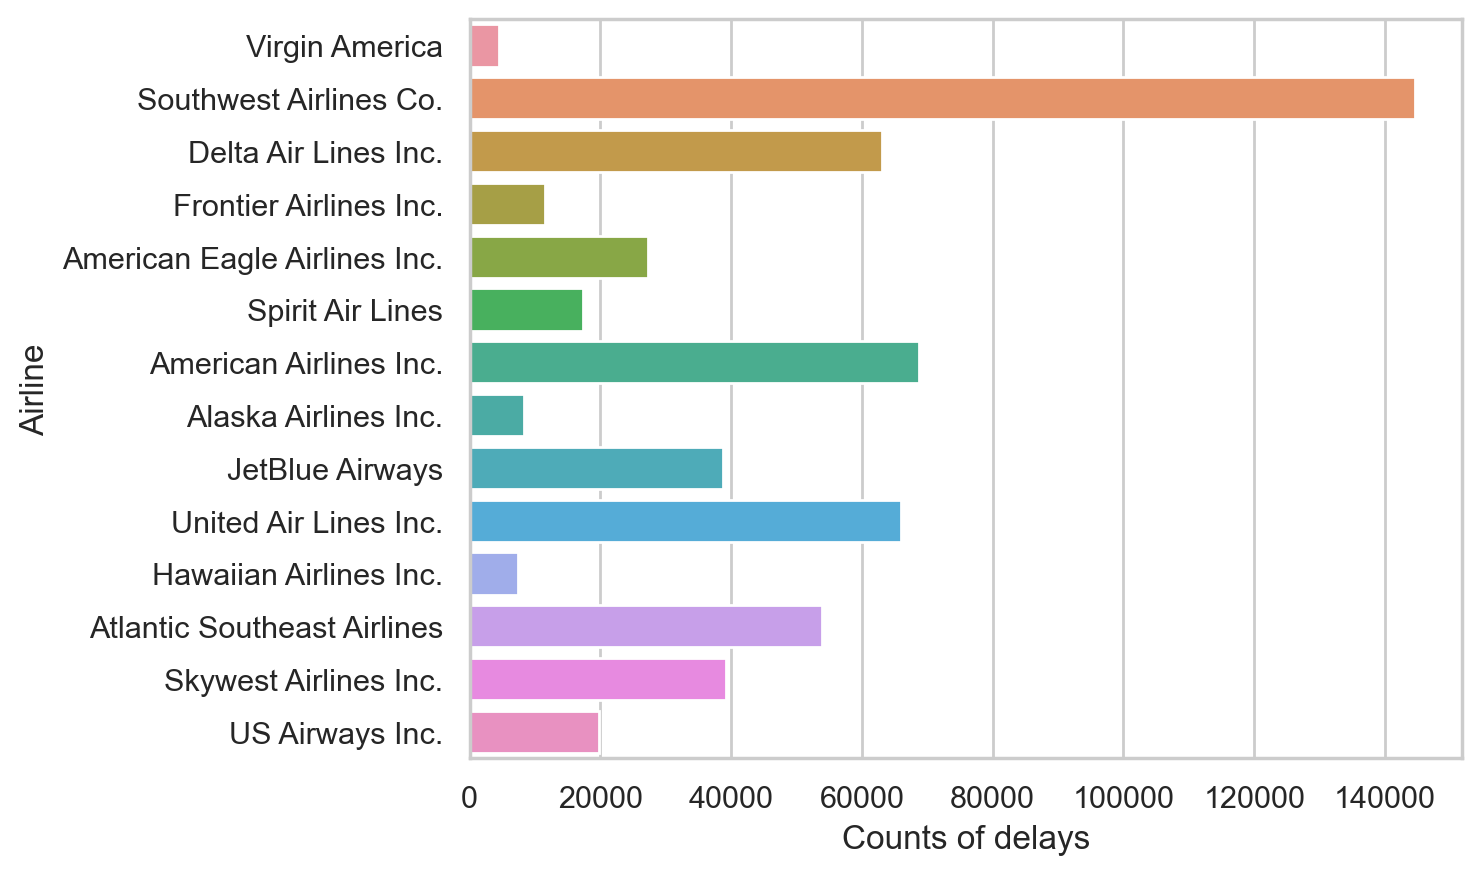

In [ ]:
sns.barplot(x='counts_of_delays', y='airline', data=df_airline_delays)
plt.xlabel('Counts of delays')
plt.ylabel('Airline')
plt.savefig('delay_by_airline.png', format="png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
%%sql counts_airline_delays <<
SELECT origin_airport AS 'origin_airport', COUNT(*) AS 'counts_airline_delays'
FROM 'data/flights.csv'
WHERE airline_delay > 0
GROUP BY origin_airport
HAVING counts_airline_delays > 10000
ORDER BY counts_airline_delays DESC;

Running query in 'duckdb://'

In [ ]:
df_counts_airline_delays = pd.DataFrame(counts_airline_delays)
df_counts_airline_delays

,origin_airport,counts_airline_delays
0,ORD,35845
1,ATL,32964
2,DFW,30327
3,DEN,25340
4,LAX,22258
5,IAH,17566
6,LAS,16274
7,PHX,16143
8,SFO,15860
9,EWR,13592


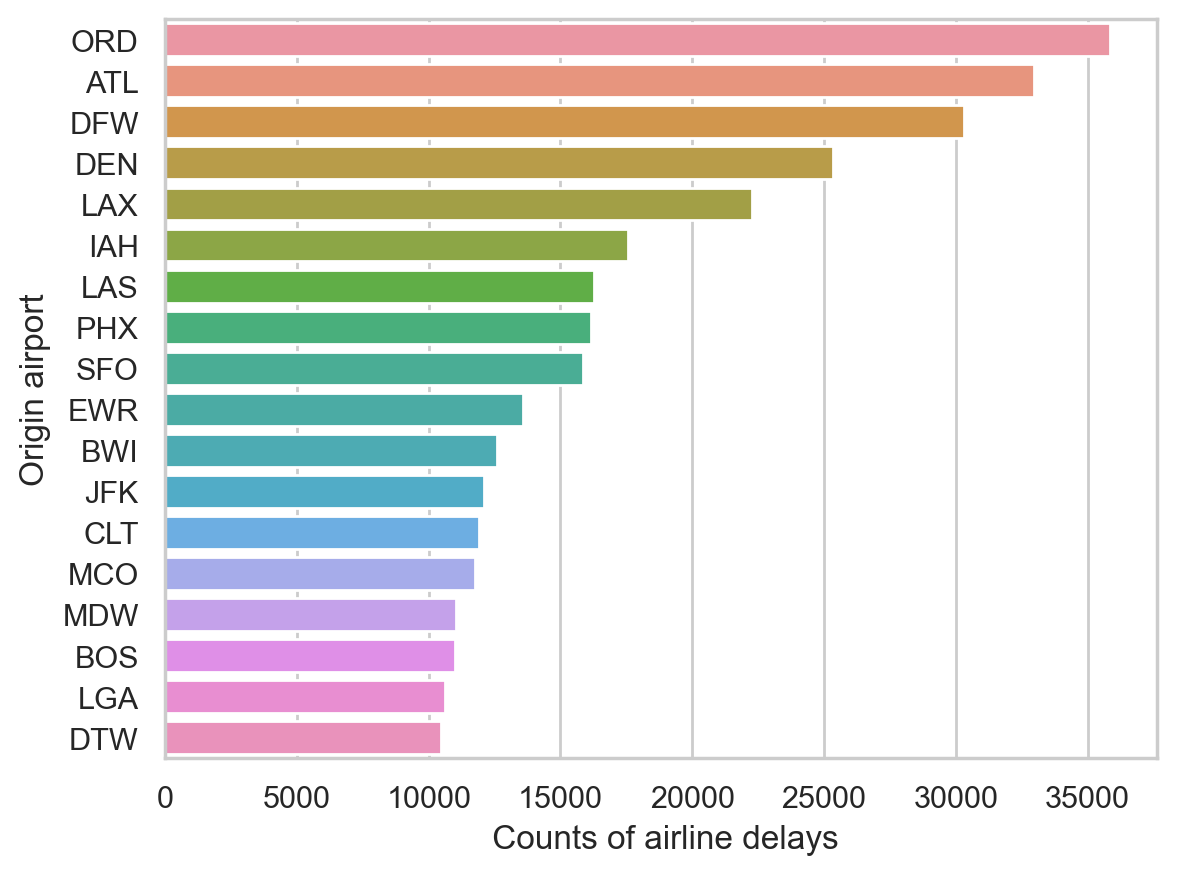

In [ ]:
sns.barplot(x='counts_airline_delays', y='origin_airport', data=df_counts_airline_delays)
plt.xlabel(' Counts of airline delays')
plt.ylabel('Origin airport')
plt.savefig('delay_by_origin_airport.png', format="png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
%%sql counts_cancelled_by_origin_airport <<
SELECT origin_airport AS 'origin_airport', COUNT(*) AS 'counts_cancelled'
FROM 'data/flights.csv'
WHERE cancelled = '1'
GROUP BY origin_airport
HAVING counts_cancelled > 2000
ORDER BY counts_cancelled DESC;

Running query in 'duckdb://'

In [ ]:
df_counts_cancelled_by_origin_airport = pd.DataFrame(counts_cancelled_by_origin_airport)
df_counts_cancelled_by_origin_airport 

,origin_airport,counts_cancelled
0,ORD,8548
1,DFW,6254
2,LGA,4531
3,EWR,3110
4,BOS,2654
5,ATL,2557
6,LAX,2164
7,SFO,2148
8,IAH,2130
9,DEN,2123


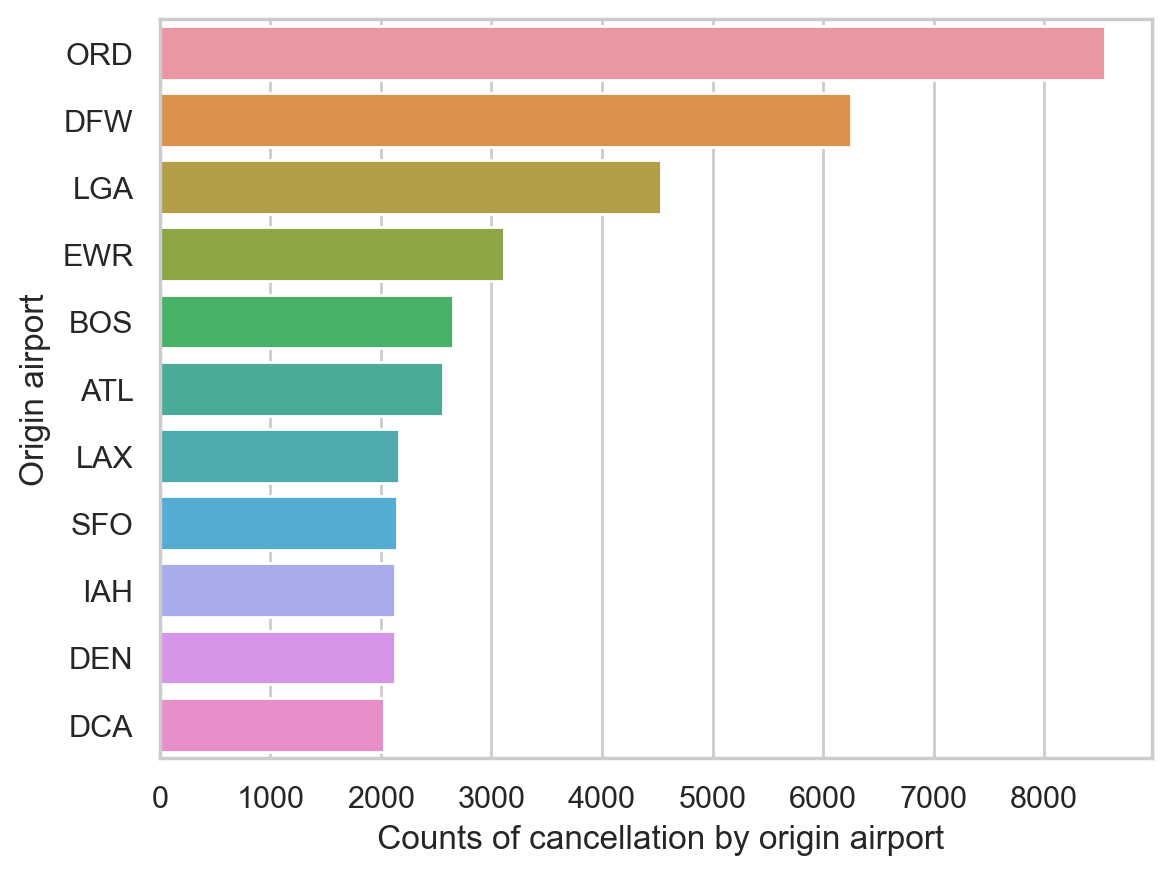

In [ ]:
sns.barplot(x='counts_cancelled', y='origin_airport', data=df_counts_cancelled_by_origin_airport)
plt.xlabel(' Counts of cancellation by origin airport')
plt.ylabel('Origin airport')
plt.savefig('cancellation_by_origin_airport.png', format="png", bbox_inches='tight', dpi=300)
plt.show()
